In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("ResultadosXGB_rob.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 2 columns):
id        60000 non-null int64
target    60000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 937.6 KB


In [4]:
df.target.min()

-405602.62

(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.100e+01, 2.500e+01,
        9.500e+01, 2.320e+02, 4.160e+02, 6.820e+02, 9.380e+02, 1.071e+03,
        1.165e+03, 1.172e+03, 1.112e+03, 1.068e+03, 1.062e+03, 1.036e+03,
        9.850e+02, 9.840e+02, 9.990e+02, 9.470e+02, 8.980e+02, 8.870e+02,
        9.120e+02, 8.660e+02, 9.390e+02, 8.940e+02, 8.940e+02, 9.730e+02,
        8.580e+02, 8.800e+02, 8.680e+02, 8.340e+02, 8.200e+02, 8.660e+02,
        8.110e+02, 7.680e+02, 7.590e+02, 7.220e+02, 7.530e+02, 7.160e+02,
        6.840e+02, 6.530e+02, 7.000e+02, 6.640e+02, 6.340e+02, 6.100e+02,
        6.030e+02, 5.910e+02, 5.920e+02, 5.470e+02, 5.650e+02, 5.290e+02,
        5.290e+02, 5.390e+02, 4.650e+02, 4.950e+02, 4.900e+02, 4.750e+02,
        4.560e+02, 4.550e+02, 3.770e+02, 4.320e+02, 4.530e+02, 3.670e+02,
        4.030e+02, 3.750e+02, 3.510e+02, 3.730e+02, 3.620e+02, 3.500e+02,
        3.290e+02, 3.660e+02, 3.430e+0

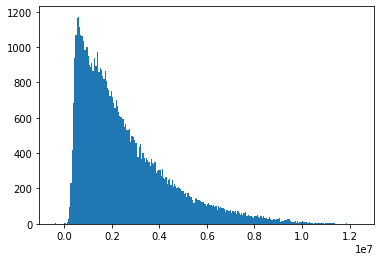

In [12]:
plt.hist(df.target, bins=250)

In [34]:
res  = 0
for elem in list(df[df['target']<200000]['target']):
    res += 200000 - elem
print(res)

2764293.4429999995


In [23]:
df[df['target']<200000].count()

id        33
target    33
dtype: int64

In [38]:
df_train = pd.read_csv("train.csv")

(array([11327., 12708., 11126., 11178., 10797.,  8050.,  7880.,  8612.,
        10365.,  7786.,  8545.,  6364.,  7229.,  7744.,  3547.,  6085.,
         5003.,  7144.,  3833.,  4816.,  4045.,  4531.,  3960.,  3409.,
         3673.,  2367.,  5156.,  2188.,  3008.,  2480.,  2202.,  2503.,
         1732.,  1602.,  2622.,  1833.,  1526.,  1781.,  1568.,   631.,
         1638.,   730.,  1930.,   806.,  1404.,   855.,  1571.,   385.,
          695.,   848.,  1538.,   475.,   438.,   992.,  1162.,   237.,
          415.,   360.,  1135.,   217.,   292.,   490.,  1073.,   126.,
          297.,   262.,   231.,   778.,   146.,   245.,   324.,   507.,
          142.,   151.,   117.,   395.,   142.,   172.,   165.,   422.,
          101.,    76.,    49.,   341.,    63.,   180.,   128.,   392.,
           33.,   108.,    56.,   230.,    35.,    56.,   151.,   346.,
           18.,    45.,    77.,   251.]),
 array([  310000.,   432150.,   554300.,   676450.,   798600.,   920750.,
         1042900.,  

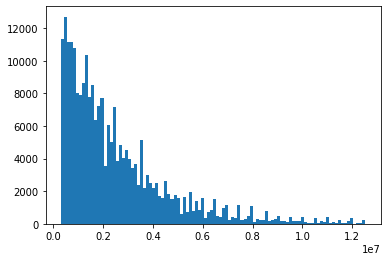

In [40]:
plt.hist(df_train.precio, bins=100)

In [48]:
def asdlog(x):
    return math.log(x)

df_train['log_prec'] = df_train.apply(lambda x: asdlog(x['precio']), axis=1)

(array([1126.,  873.,  822., 1405., 1312., 1287., 1980.,  742., 1781.,
         932., 2521., 1715., 2537., 1255., 1265., 3122., 1806., 2694.,
        1200., 1407., 3180., 2404., 2436., 3368., 1836., 3152., 1521.,
        3374., 3491., 1362., 3022., 3726., 1827., 1074., 3201., 2494.,
        4271., 3245., 4313., 3166., 3877., 2487., 4980., 2672., 4030.,
        3685., 4526., 3973., 3500., 4120., 3828., 3148., 4517., 2109.,
        4363., 3521., 4987., 2879., 3616., 4917., 3587., 3514., 2593.,
        5221., 2353., 4407., 2730., 3491., 3119., 2875., 2388., 2459.,
        3679., 1597., 2788., 2081., 1776., 2601., 1501., 1965., 2040.,
        1087., 2012., 1434., 1401.,  941., 1395., 1642.,  622., 1084.,
         680.,  794.,  609.,  806.,  233.,  588.,  609.,  368.,  559.,
         391.]),
 array([12.64432758, 12.68131667, 12.71830577, 12.75529487, 12.79228396,
        12.82927306, 12.86626215, 12.90325125, 12.94024035, 12.97722944,
        13.01421854, 13.05120764, 13.08819673, 13.125185

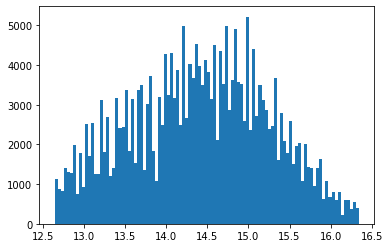

In [49]:
plt.hist(df_train['log_prec'], bins=100)

In [51]:
df_train.log_prec.describe()

count    240000.000000
mean         14.410487
std           0.837643
min          12.644328
25%          13.767131
50%          14.430696
75%          15.036340
max          16.343237
Name: log_prec, dtype: float64

In [60]:
14.410487+(1.96*0.837643)

16.05226728

In [61]:
14.410487-(1.96*0.837643)

12.768706719999999

In [68]:
math.e**12.1

179871.8622537509

In [69]:
math.e**16.05226728

9362915.45323114

In [72]:
df.target.max()

12398934.0

12525000.0

In [74]:
df = pd.read_csv("ResultadosXGB.csv")

In [85]:
df_train.precio.max() - df.target.max()

631086.0

(array([1.000e+00, 1.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 3.800e+01,
        1.760e+02, 3.690e+02, 6.960e+02, 9.940e+02, 1.184e+03, 1.206e+03,
        1.208e+03, 1.103e+03, 1.037e+03, 1.015e+03, 9.910e+02, 9.170e+02,
        9.180e+02, 9.030e+02, 8.680e+02, 8.610e+02, 8.550e+02, 8.250e+02,
        8.580e+02, 8.260e+02, 8.710e+02, 7.680e+02, 8.430e+02, 8.100e+02,
        8.310e+02, 8.460e+02, 8.170e+02, 7.660e+02, 7.790e+02, 7.450e+02,
        7.910e+02, 7.350e+02, 7.110e+02, 7.570e+02, 6.900e+02, 6.740e+02,
        6.570e+02, 6.440e+02, 5.840e+02, 6.510e+02, 6.360e+02, 5.720e+02,
        6.010e+02, 5.580e+02, 5.550e+02, 5.270e+02, 5.480e+02, 5.250e+02,
        5.100e+02, 4.820e+02, 5.110e+02, 4.550e+02, 4.740e+02, 4.350e+02,
        4.370e+02, 4.380e+02, 4.600e+02, 4.220e+02, 4.040e+02, 3.640e+02,
        4.030e+02, 3.560e+02, 3.760e+02, 3.530e+02, 3.620e+02, 3.430e+02,
        3.300e+02, 3.570e+02, 3.340e+02, 3.270e+02, 3.340e+02, 3.120e+02,
        3.080e+02, 2.970e+02, 3.020e+0

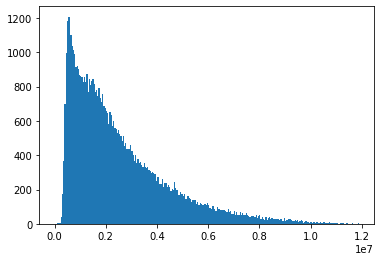

In [76]:
plt.hist(df.target, bins=250)

In [81]:
df[df.target < 100000].count()

id        2
target    2
dtype: int64

In [ ]:
target_lower_bound = 50000
target_upper_bound = 250000

def adjust_target_values(target_value, min_val):
    if (target_value >= target_upper_bound):
        return target_value
    correction = (target_value - min_val)/(target_upper_bound - min_val)*(target_upper_bound - target_lower_bound)
    return target_lower_bound + correction
    
if (df_predictions.target.min() < target_lower_bound):
    min_val = df_predictions['target'].min()
    df_predictions['target_corr'] = df_predictions.apply(lambda x: adjust_target_values(x['target'], min_val), axis=1)